# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


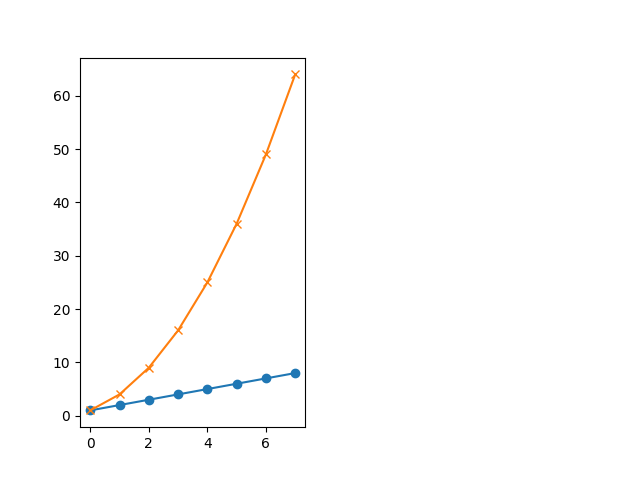

In [14]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(121)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [11]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(224)
plt.plot(exponential_data, '-o')

In [15]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


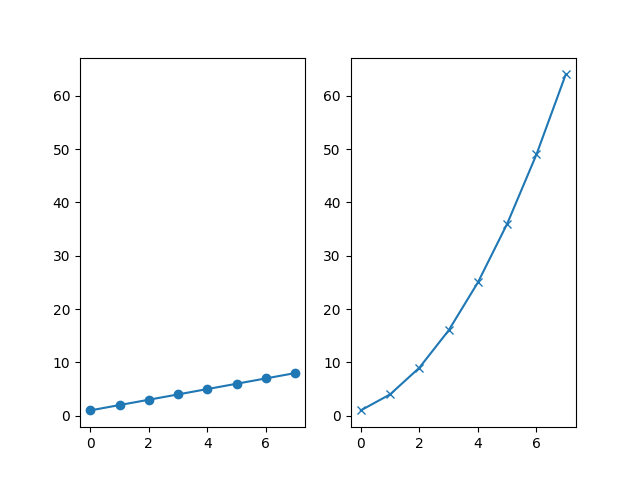

In [19]:
plt.figure()

ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


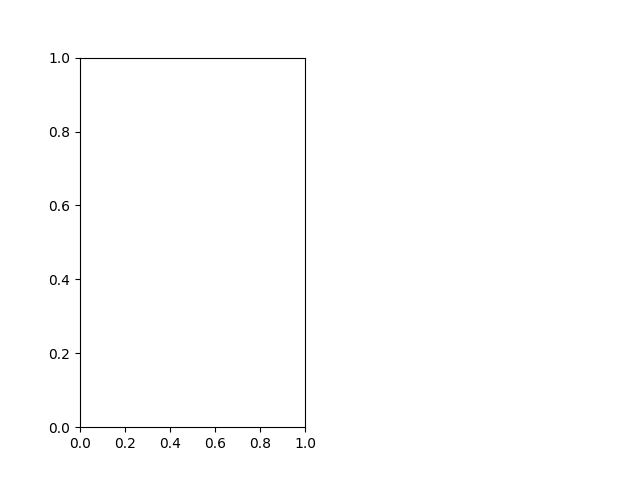

True

In [23]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


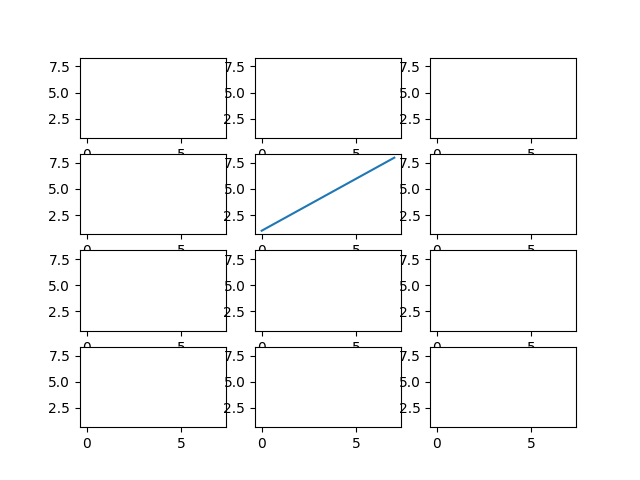

In [26]:
# create a 4x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [27]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [ ]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

In [29]:
np.random.normal(loc=0.0, scale=1.0, size=2)

array([-2.16608361, -0.8768811 ])

<IPython.core.display.Javascript object>


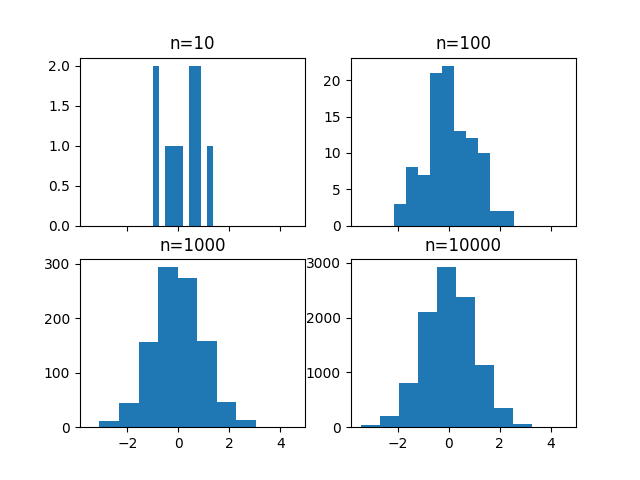

In [28]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms


for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


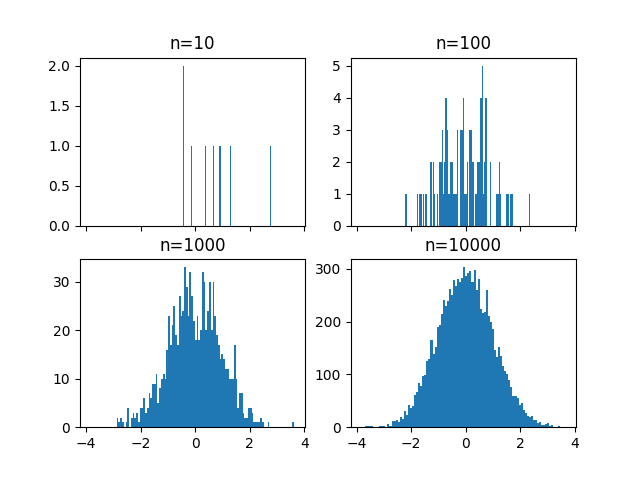

In [33]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


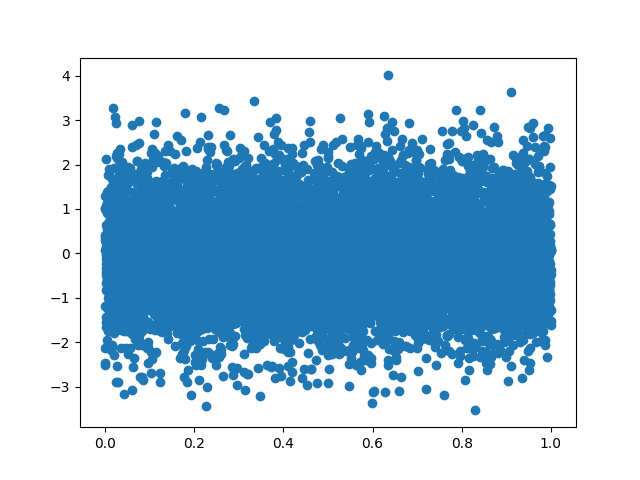

In [34]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


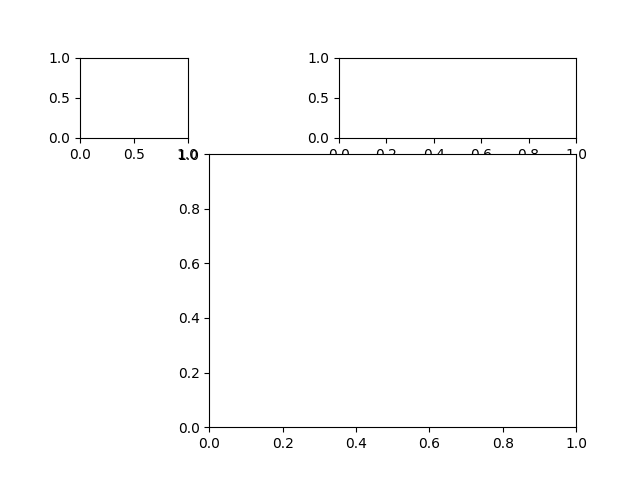

In [39]:
# use gridspec to partition the figure into subplots
#Just like a matrix
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(4, 4)
top_histogram = plt.subplot(gspec[0, 2:])
side_histogram = plt.subplot(gspec[0,0])
lower_right = plt.subplot(gspec[1:, 1:])

In [ ]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [38]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [ ]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [3]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.997481,0.002479,0.498870
std,1.413436,1.008075,0.288217
min,0.009784,-4.116505,0.000109
25%,0.954165,-0.668636,0.248312
50%,1.674399,-0.000195,0.496712
75%,2.701413,0.684531,0.747612
max,12.280875,4.129489,0.999884


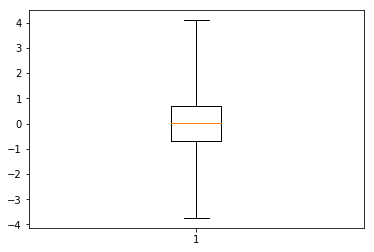

In [32]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output

#If we do not include whis='range', it will pick some outliers. The formula is: Q1-[1.5*(Q3-Q1)] & Q3+[1.5*(Q3-Q1)] 
_=plt.boxplot(df['normal'], whis='range')
plt.show(_)

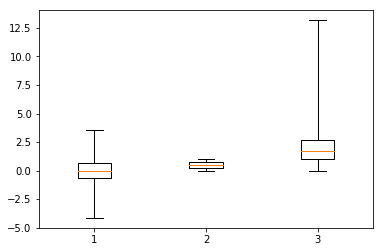

In [6]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
plt.show(_)


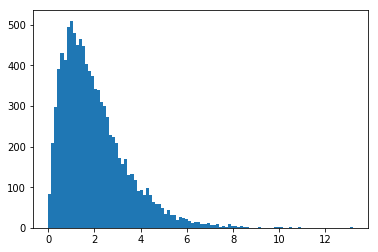

In [5]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)
plt.show(_)

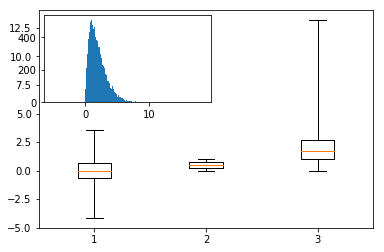

In [29]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='50%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
plt.show()

In [12]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()
plt.show()

In [ ]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

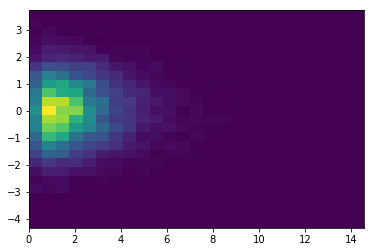

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

Y = np.random.normal(loc=0, scale=1.0, size=10000)
X = np.random.random(size=10000)
X=  np.random.gamma(2, size=10000)
_ = plt.hist2d(X, Y, bins=25)
plt.show(_)

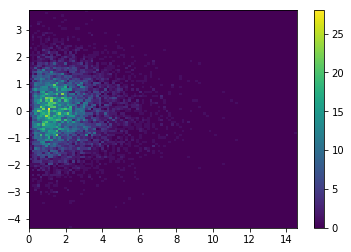

In [45]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
plt.colorbar()
plt.show(_)

In [46]:
# add a colorbar legend
plt.colorbar()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

# Animations

In [2]:
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

n = 1000
x = np.random.gamma(2,2,n)

In [44]:
np.arange(-4, 4, 0.5)
x

array([  3.55427621,   4.31808556,   4.82915814,   1.41091872,
         8.69084798,   2.2497201 ,   6.41373839,   6.59437284,
         1.89867487,   4.07538308,   2.55188069,   1.78226384,
         4.96050842,   2.12301963,   3.60673862,   0.9111998 ,
         2.99598182,   2.67028812,   1.39523272,   4.740932  ,
         4.26994019,   2.02300041,   3.43681338,   9.11535195,
         2.6939899 ,   4.06476734,   3.4049738 ,   0.68901035,
         0.63372118,   2.43293787,   2.14040288,   6.56454743,
         5.71362518,   2.14147467,   3.32746314,   1.37656887,
         0.62066229,   5.77062973,   1.9108961 ,   2.23080635,
         3.93946415,   0.9936251 ,   6.89567208,   3.48889854,
         5.18658005,   2.58911451,   4.70322989,   4.55603837,
         6.24371497,   5.90738098,   6.3930989 ,   5.3191566 ,
         3.82263552,   2.09111641,   2.45953099,   1.74269513,
         2.06763773,   3.87129602,   1.66845936,   5.56083412,
         5.4908771 ,   3.75421894,   2.81747005,   6.34

In [62]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(0, 4, 0.1)
    plt.hist(x[:curr], bins=bins)
    plt.axis([0,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3.5,27] )
     

<IPython.core.display.Javascript object>


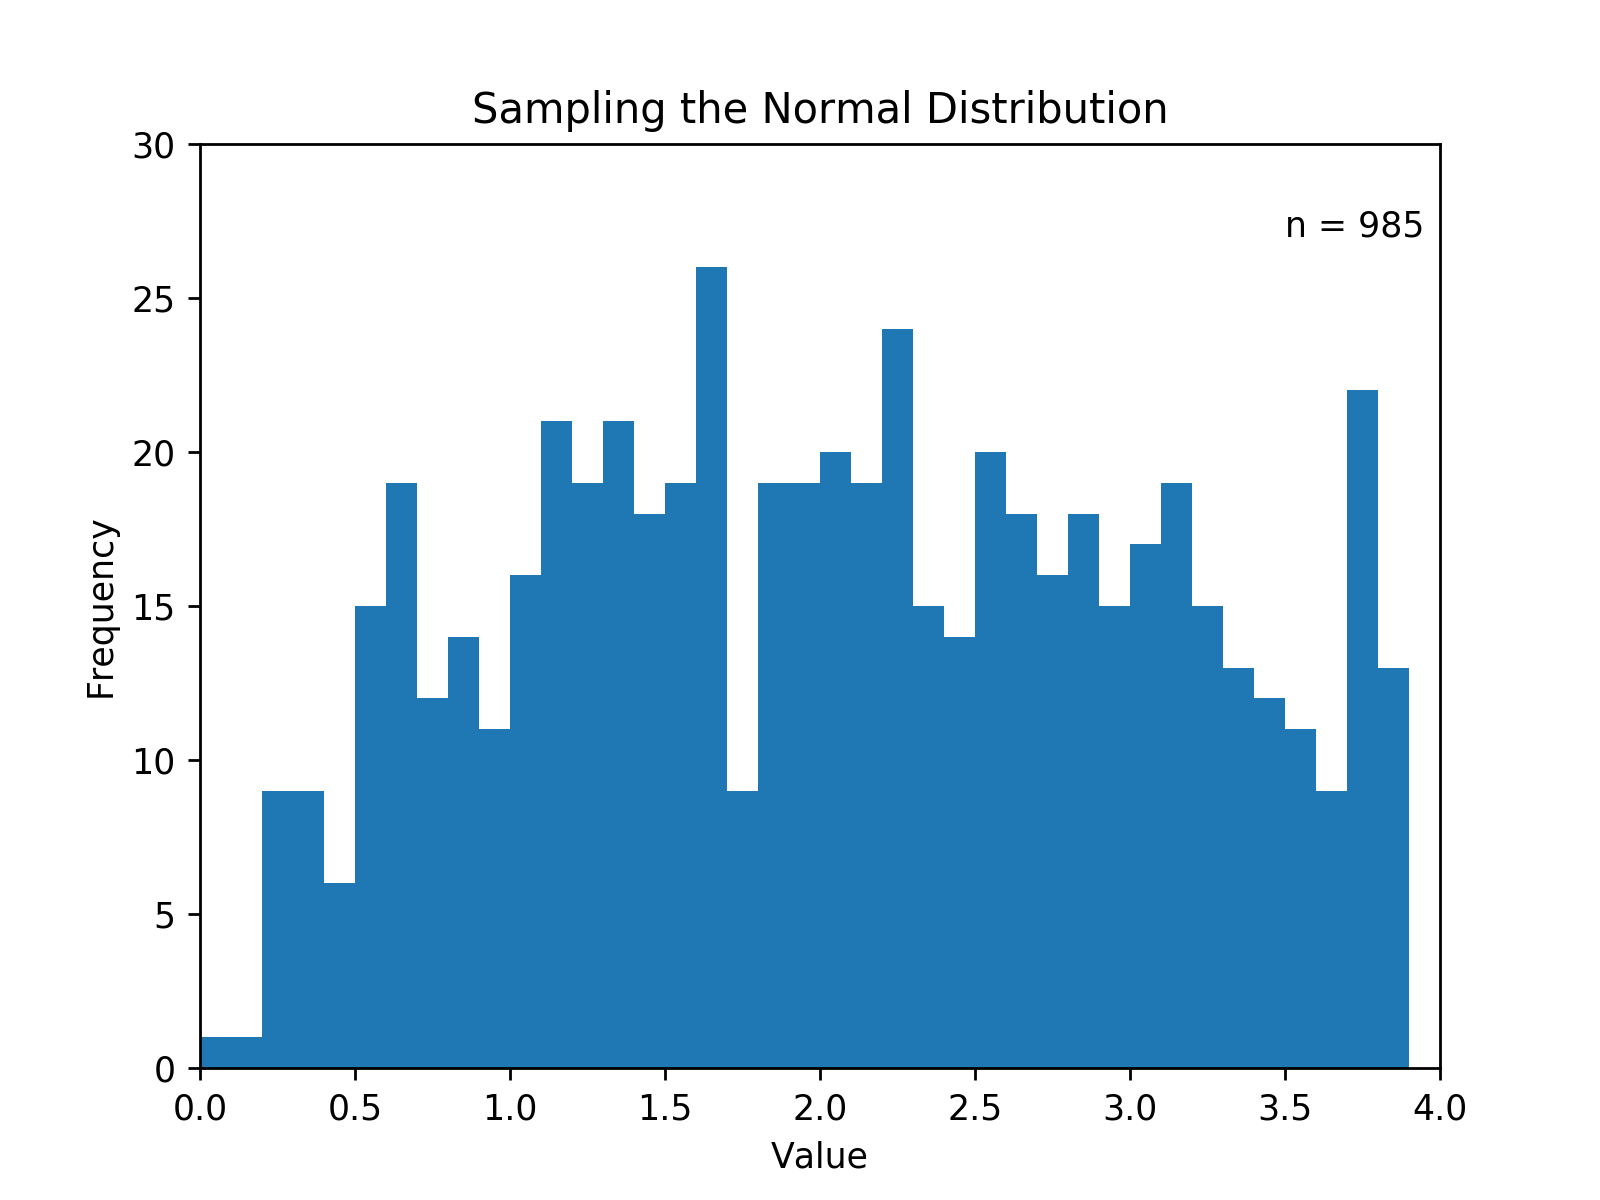

In [63]:
fig = plt.figure()
a=animation.FuncAnimation(fig, update, interval=1)
plt.show(a)


# Interactivity

<IPython.core.display.Javascript object>


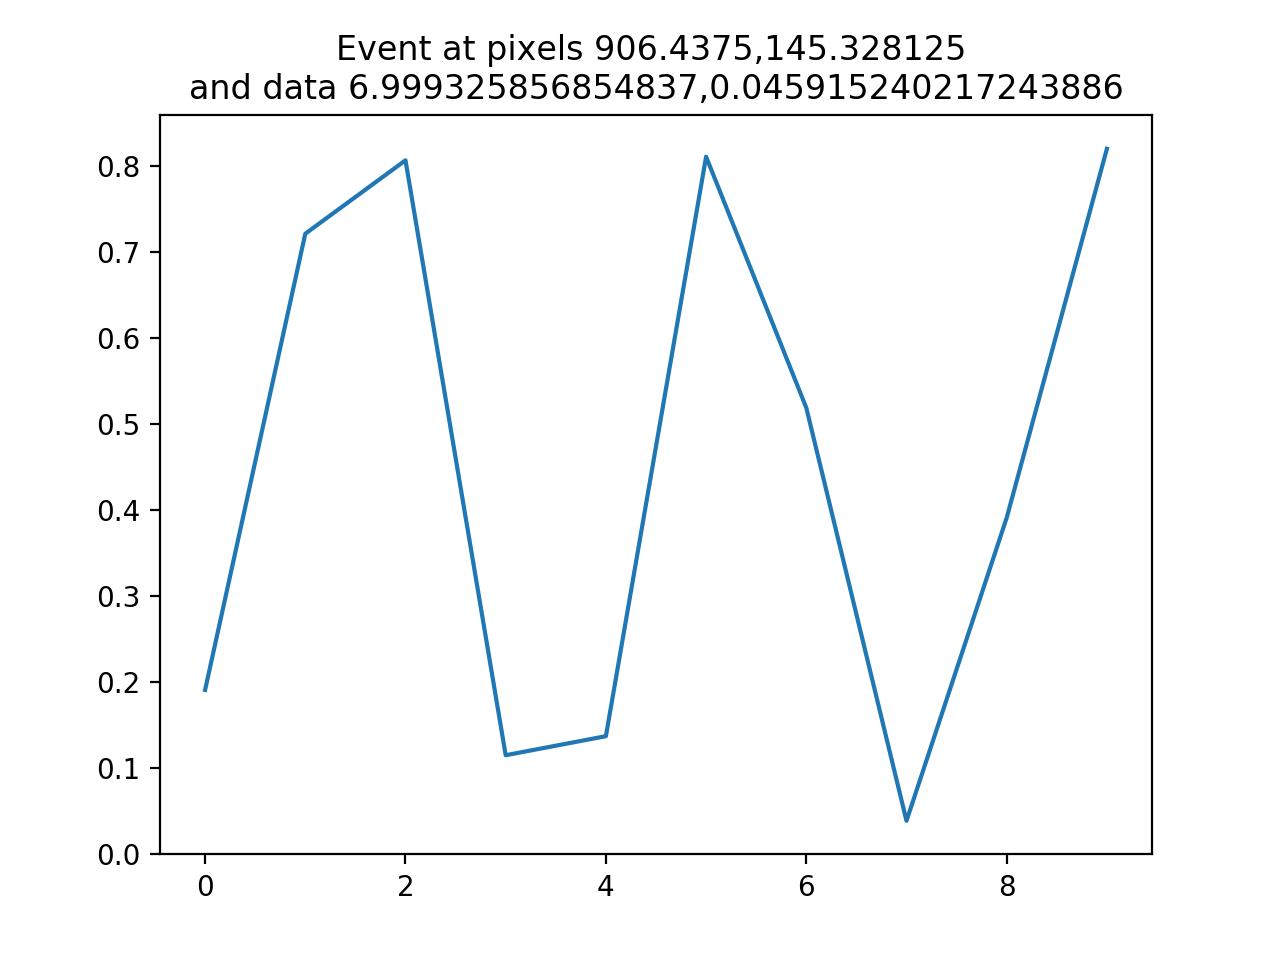

7

In [6]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    #plt.cla()
    #plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)


In [70]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df


,height,origin,weight
0,0.739773,China,0.427746
1,0.804061,Germany,0.916491
2,0.637941,Iraq,0.106780
3,0.520380,Mexico,0.427856
4,0.839980,Chile,0.572721
5,0.711134,Brazil,0.842822
6,0.019806,USA,0.036977
7,0.884917,Canada,0.333643
8,0.547635,India,0.724471
9,0.509836,UK,0.547848


<IPython.core.display.Javascript object>


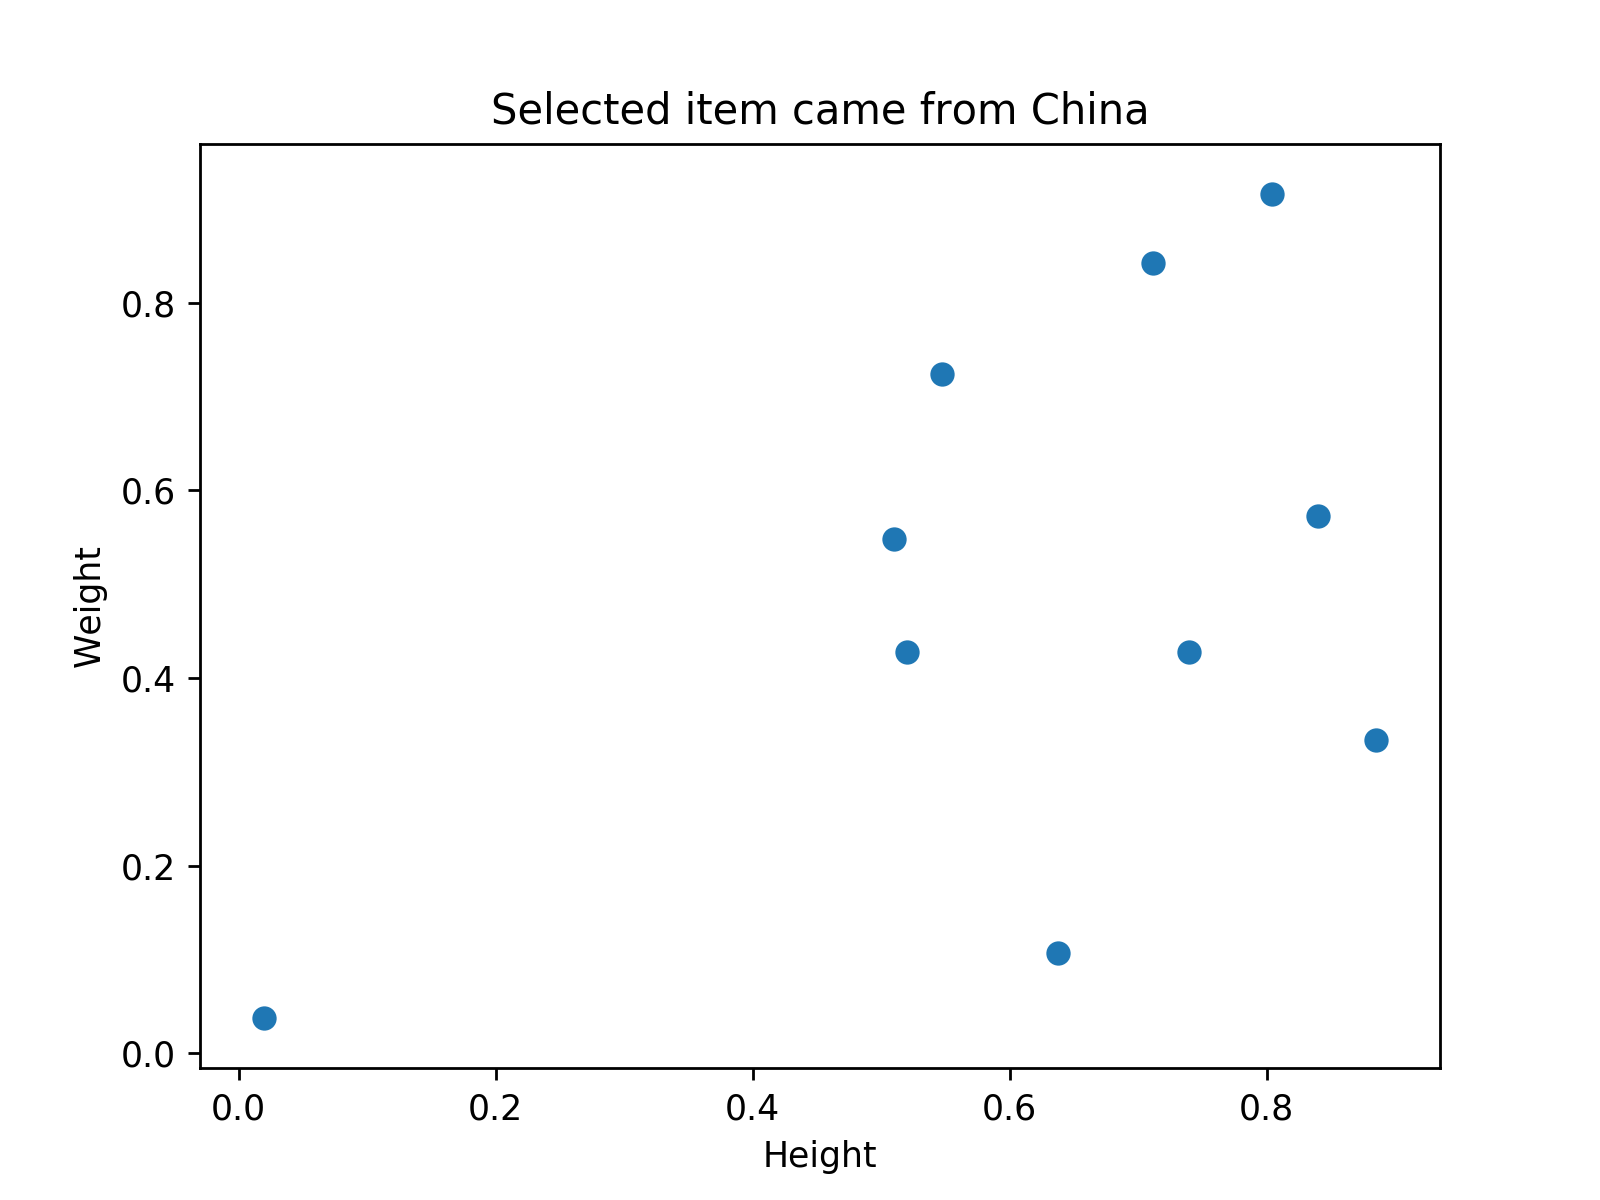

In [71]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')


In [80]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)



15